# sc-ATAC-seq

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
from pathlib import Path
import scvi
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sn
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

scvi.settings.seed = 30

Seed set to 30


### Data Analysis

In [2]:
######################################################## load data
file = 'sc_atac_seq.h5ad' ### <--- data
dat1 = sc.read_h5ad(file)

######################################################## filter
sc.pp.filter_genes(dat1, min_cells = 100)
sc.pp.highly_variable_genes(dat1, n_top_genes = 2000, subset = True, flavor = 'seurat_v3') ####

######################################################## normalize data
dat1.layers['counts'] = dat1.X.copy()
sc.pp.normalize_total(dat1, target_sum = 10000)
sc.pp.log1p(dat1)
dat1.raw = dat1

In [3]:
dat1

AnnData object with n_obs × n_vars = 1589 × 2000
    obs: 'orig.ident', 'nCount_peaks', 'nFeature_peaks', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'peaks_snn_res.0.8', 'seurat_clusters', 'nCount_RNA', 'nFeature_RNA'
    var: 'features', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p'
    obsm: 'X_umap'
    layers: 'counts'

In [4]:
######################################################## clustering
sc.pp.neighbors(dat1, n_neighbors=10)
sc.tl.leiden(dat1, resolution=0.01)

2025-05-18 00:43:20.160842: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747543400.177707  266835 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747543400.182806  266835 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


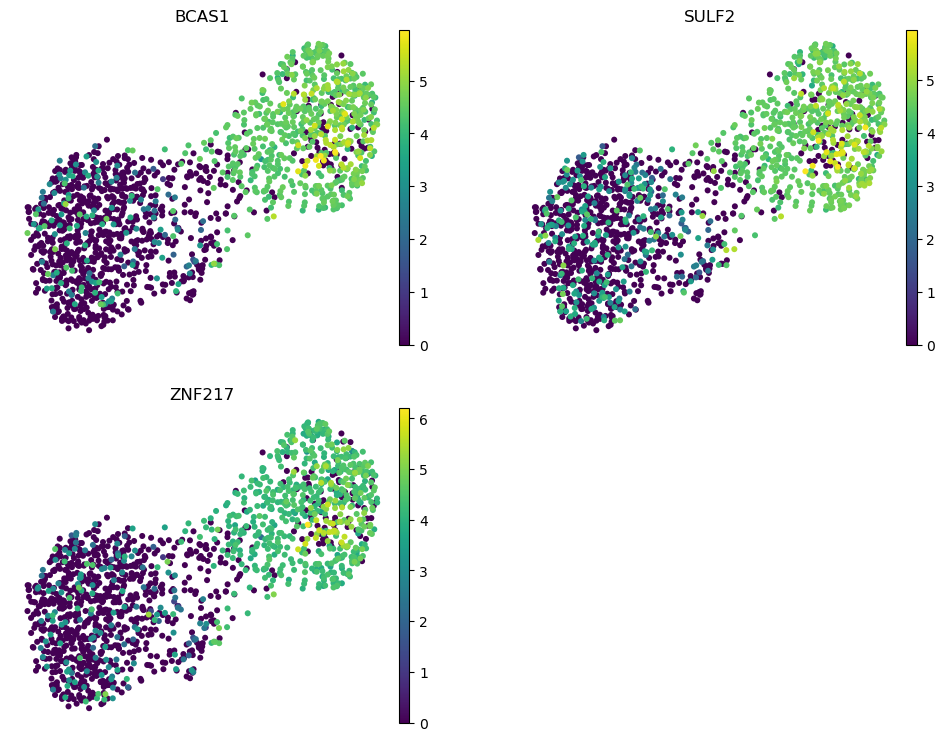

In [5]:
######################################################## plot biomarker genes
fig, axs = plt.subplots(2,2, figsize=(12,9))

sc.pl.umap(dat1, color = ['BCAS1'], frameon = False, ax=axs[0,0], show=False)
sc.pl.umap(dat1, color = ['SULF2'], frameon = False, ax=axs[0,1], show=False)
sc.pl.umap(dat1, color = ['ZNF217'], frameon = False, ax=axs[1,0], show=False)
plt.delaxes(axs[1,1])
plt.savefig('biomarkers_scatacseq.png')

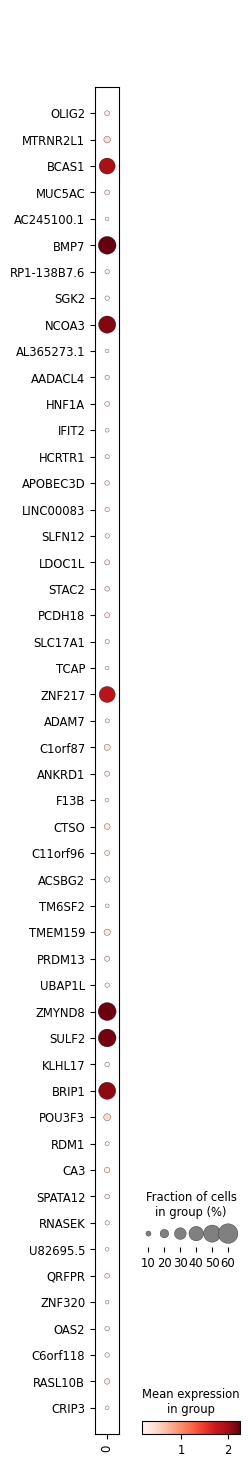

In [6]:
######################################################## highly variable genes, expression profile
dat100 = dat1[:, dat1.var['highly_variable_rank'] < 50]
dat100 = dat100[:, dat100.var.sort_values('highly_variable_rank').index]
var_name_list = dat100.var_names.tolist()
sc.pl.dotplot(dat1, var_name_list, groupby="leiden" , swap_axes=True, save='dotplot_rank_genes_group_scatacseq.png')

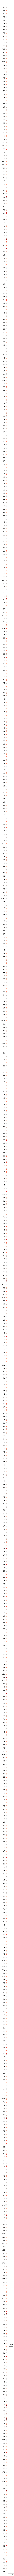

In [7]:
######################################################## plot APA genes, TR
list = 'merged_polyadb_scatacseq.csv' ### <--- load gene list
gene_list = pd.read_csv(list)
gene_list = gene_list['gene_symbol'].tolist()
apa = dat1[:, gene_list]
#apa = apa[:, apa.var.sort_values('highly_variable_rank').index]
sc.pl.dotplot(apa, apa.var_names, groupby="leiden", swap_axes=True, save='apa_genes_database_scatacseq.png')

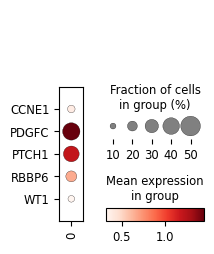

In [8]:
list = 'merged_paper_polyadb_scatac.csv' ### <--- load gene list
gene_list = pd.read_csv(list)
gene_list = gene_list['gene_symbol'].tolist()
apa2 = dat1[:, gene_list]
#apa2 = apa2[:, apa2.var.sort_values('highly_variable_rank').index]
sc.pl.dotplot(apa2, apa2.var_names, groupby="leiden", swap_axes=True, save='apa_genes_scatacseq.png')